In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import glob
import cartopy as cp
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.colors import ListedColormap, BoundaryNorm
from plot_ACCLIP_profs import plot_model_overlay, get_ACCLIP_merge_data, get_model_prof_data
import var_config as vc
from get_cbar import get_colorbar

In [2]:
def draw_box(ax, left, right, bot, top, col, thk):
    ax.plot([left, left], [bot, top], color=col, linewidth=thk)
    ax.plot([right, right], [bot, top], color=col, linewidth=thk)
    ax.plot([left, right], [bot, bot], color=col, linewidth=thk)
    ax.plot([left, right], [top, top], color=col, linewidth=thk)    

In [3]:
def make_map_diff_plot(ax, SAVEDIR, model_names, var, prs_lvl, lev_choice, cbaraxes = [0.13,0.21,0.77,0.02], cbmin=0.01, cb_or='horizontal'):

    var_mod = vc.var_info[var]['mod']
    var_lab = vc.var_info[var]['lab']
    unit = vc.var_info[var]['unit']

    with open(SAVEDIR + model_names[0] + '_' + var + '_MapData_' + lev_choice + '.pkl', 'rb') as f:  
        var_array1, lvls1, lon, lat, date, datesec = pkl.load(f)
    p = list(lvls1).index(prs_lvl)
    var_mean1 = np.nanmean(np.squeeze(var_array1[:,p,:,:]), axis = 0)*var_mod

    with open(SAVEDIR + model_names[1] + '_' + var + '_MapData_' + lev_choice + '.pkl', 'rb') as f:  
        var_array2, lvls2, lon, lat, date, datesec = pkl.load(f)
    p = list(lvls2).index(prs_lvl)
    var_mean2 = np.nanmean(np.squeeze(var_array2[:,p,:,:]), axis = 0)*var_mod    

    #var_diff = var_mean1 - var_mean2
    var_pct = -(var_mean1 - var_mean2)*100./var_mean1   # Adding a negative sign to change to a percent reduction

    #var_diff_cyc, lon_cyc = cp.util.add_cyclic_point(var_diff, coord=lon)
    var_pct_cyc, lon_cyc = cp.util.add_cyclic_point(var_pct, coord=lon)
    
    print(np.min(var_pct), np.max(var_pct))

    colormap = plt.get_cmap('Blues')
    #colormap = plt.get_cmap('coolwarm')
    #levels = np.arange(cbmin,0.001,-cbmin/10.)
    levels = [0,1,2,3,5,7,9,12,15,20,25]
    #levels = [-25,-15,-10,-5,-3,-1,0]
    norm = BoundaryNorm(levels, colormap.N)
    #colormap.set_under([0.9,0.9,0.9])

    
    #levels, colormap, norm = get_colorbar(var, prs_lvl, 0)  # Get colorbar information

    #ax.set_ylim([-90,90])
    #ax.set_xlim([0,360])
    #ax.set_xlim([60,160])
    #ax.set_ylim([0,50])

    con = ax.contourf(lon_cyc, lat, var_pct_cyc, cmap = colormap, levels = levels, norm=norm, extend = 'both', transform=ccrs.PlateCarree())
    ax.coastlines()

    cbaxes = fig.add_axes(cbaraxes)
    cbar = plt.colorbar(con, cax=cbaxes, label = var_lab + ' reduction (%)', \
            orientation=cb_or, spacing='uniform',\
            shrink=0.5, extend='both', ticks=levels[:-1])   

    GV_OBSROOT = '/glade/work/wsmith/ACCLIP_GV_R1_60SEC_Merge/'
    GV_FLT_DATES = ['20220730','20220804','20220806','20220807','20220812','20220815','20220816','20220819','20220822','20220823','20220825','20220826','20220829','20220830']
    ACCLIP_GV_lon = get_ACCLIP_merge_data(GV_OBSROOT, GV_FLT_DATES, 'GGLON') 
    ACCLIP_GV_lat = get_ACCLIP_merge_data(GV_OBSROOT, GV_FLT_DATES, 'GGLAT')     

    WB_OBSROOT = '/glade/work/wsmith/ACCLIP_WB57_R1_60SEC_Merge/'
    WB_FLT_DATES = ['20220802','20220804','20220806','20220812','20220813','20220815','20220816','20220819','20220821','20220823','20220825','20220826','20220829','20220831','20220901']
    ACCLIP_WB_lon = get_ACCLIP_merge_data(WB_OBSROOT, WB_FLT_DATES, 'G_LONG_MMS') 
    ACCLIP_WB_lat = get_ACCLIP_merge_data(WB_OBSROOT, WB_FLT_DATES, 'G_LAT_MMS') 

    #ax.scatter(ACCLIP_GV_lon, ACCLIP_GV_lat, s=0.1, color='black')
    #ax.scatter(ACCLIP_WB_lon, ACCLIP_WB_lat, s=0.1, color='gray')

    #draw_box(ax, 125, 140, 25, 38, 'magenta', 2)
    #draw_box(ax, 95, 125, 30, 45, 'magenta', 2)
    

In [4]:

SAVEDIR = '/glade/derecho/scratch/wsmith/carma_vars/map_vars/'


-0.21218057914934876 4.275509713778628
0.8509915384096977 24.748583319869542
-0.2899681553707201 46.759954400691775


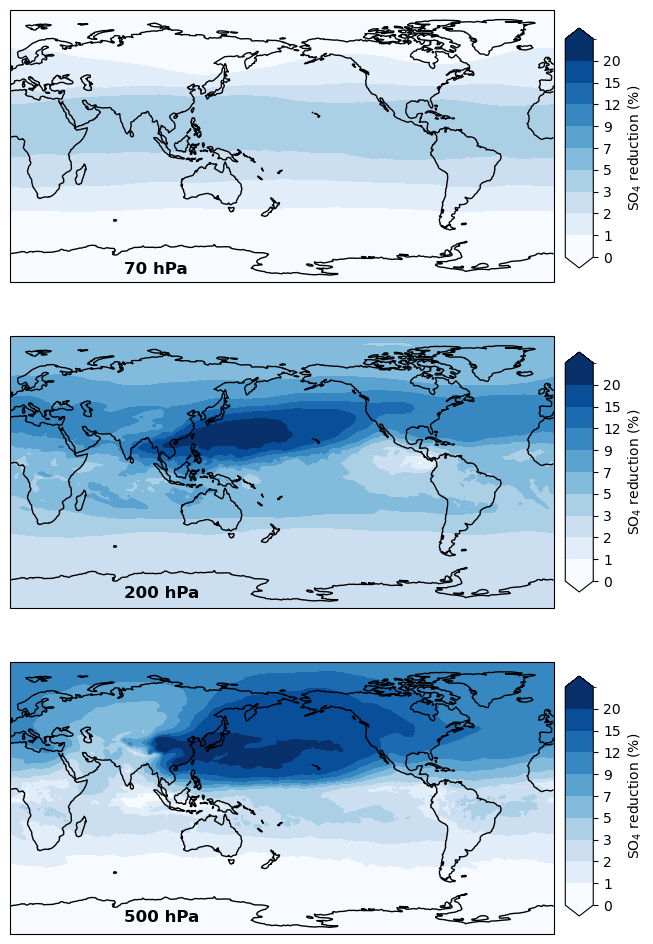

In [5]:

#model_names = ['MAM4_MEIC_SO2_rad','MAM4_CAMS6.2_SO2_rad']
model_names = ['CARMA_MEIC_SO2_rad','CARMA_CAMS_SO2_rad']
#prs_lvl = 100
lev_choice = 'plev'

fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(311, projection = ccrs.PlateCarree(central_longitude=180))
ax2 = fig.add_subplot(312, projection = ccrs.PlateCarree(central_longitude=180))
ax3 = fig.add_subplot(313, projection = ccrs.PlateCarree(central_longitude=180))
#ax4 = fig.add_subplot(224, projection = ccrs.PlateCarree())

#make_map_diff_plot(ax1, SAVEDIR, model_names, 'SO4', 70., lev_choice, cbaraxes = [0.715,0.665,0.02,0.2], cb_or='vertical', cbmin=-10)
make_map_diff_plot(ax1, SAVEDIR, model_names, 'SO4', 100., lev_choice, cbaraxes = [0.715,0.665,0.02,0.2], cb_or='vertical', cbmin=-10)
make_map_diff_plot(ax2, SAVEDIR, model_names, 'SO4', 200., lev_choice, cbaraxes = [0.715,0.395,0.02,0.2], cb_or='vertical', cbmin=-10)
make_map_diff_plot(ax3, SAVEDIR, model_names, 'SO4', 500., lev_choice, cbaraxes = [0.715,0.125,0.02,0.2], cb_or='vertical', cbmin=-10)

#plt.figtext(0.40,0.66,'70 hPa', fontsize=12, fontweight='bold')
plt.figtext(0.40,0.66,'100 hPa', fontsize=12, fontweight='bold')
plt.figtext(0.40,0.39,'200 hPa', fontsize=12, fontweight='bold')
plt.figtext(0.40,0.12,'500 hPa', fontsize=12, fontweight='bold')

#ax1.set_position([0.05,0.54,0.40,0.3])
#ax2.set_position([0.55,0.54,0.40,0.3])
#ax3.set_position([0.05,0.20,0.40,0.3])
#ax4.set_position([0.55,0.20,0.40,0.3])

plt.savefig('/glade/u/home/wsmith/ASM_SO4_scripts/plots/Figure2.png')
plt.savefig('/glade/u/home/wsmith/ASM_SO4_scripts/plots/Figure2.pdf')

